In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use({'figure.facecolor':'white'})
import matplotlib as mpl
from matplotlib.patches import Rectangle
from matplotlib import rc
from matplotlib import cm, ticker
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

#mpl.rcParams['font.family'] = ['times new roman'] # default is sans-serif
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rc('text', usetex=False)
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath,bm}'] #for \text command

import scipy.stats as ss
from tqdm import tqdm
from datetime import datetime
now = datetime.now()
date = now.strftime("%d_%m_%Y_%H:%M")
import torch as th
import seaborn as sns
from mpl_toolkits import mplot3d
import pandas as pd

datetime = datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p")

# Initialize random number generator
RANDOM_SEED = 420
rng = np.random.default_rng(RANDOM_SEED)
%load_ext autoreload
%autoreload 2
seed = 420

/tmp/ipykernel_5409/2267851350.py:16: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath,bm}'] #for \text command


In [2]:
def plot_optimisation_results(path_data :str, path_solver_output:str, pdf_output=True, path_pdf :str=None):
    """
    """
    df = pd.read_csv(path_data, index_col=0)
    y_b = np.load(path_solver_output)
    
    # plotting the objective
    fig1, ax1 = plt.subplots(1, 1)
    plt.plot(df['E_objective'],'*-')
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

    plt.grid()
    plt.xlabel('Iterations')
    plt.ylabel('$\mathcal{O}(x)$')
    plt.tight_layout()
    
    # plotting the constraints
    fig2, ax2 = plt.subplots(1, 1)
    plt.plot(df['E_constraints'],'*-')
    plt.grid()
    plt.tight_layout()
    plt.axhline(y = 68, color = 'r', linestyle = '-')
    plt.xlabel('Iterations')
    plt.ylabel('$\mathcal{C}(x)$')
    plt.tight_layout()
    
    # loss function evolution 
    fig3, ax3 = plt.subplots(1, 1)
    plt.plot(df['loss'],'*-')
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    plt.grid()
    plt.xlabel('Iterations')
    plt.ylabel('$loss$')
    plt.tight_layout()
    
    # design variable x evolution 
    fig4, ax4 = plt.subplots(1, 1)
    plt.plot(df['X'],'*-')
    plt.tight_layout()
    plt.grid()
    plt.xlabel('Iterations')
    plt.ylabel('$x$')
    
    # grad design variable x evolution 
    fig5, ax5 = plt.subplots(1, 1)
    plt.plot(df['X_grad'],'*-')
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    plt.grid()
    plt.xlabel('Iterations')
    plt.ylabel(r'$\nabla_x \mathcal{L}(x,c)$')
    plt.tight_layout()
    
    # penalty paramter c evolution
    fig6, ax6 = plt.subplots(1, 1)
    plt.plot(df['C'],'*-')
    #plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    plt.grid()
    plt.xlabel('Iterations')
    plt.ylabel('$c$')
    plt.tight_layout()
    
    
    # stats of solver output at x_star
    fig7, ax7 = plt.subplots(1, 1)
    sns.kdeplot(y_b[:,0])
    plt.axvline(x=np.mean(y_b[:,0]),color = 'r', linestyle = '-')
    plt.xlabel('$t_c$')
    plt.tight_layout()
    
    fig8, ax8 = plt.subplots(1, 1)
    sns.kdeplot(y_b[:,1])
    plt.axvline(x=np.mean(y_b[:,1]),color = 'r', linestyle = '-')
    plt.xlabel('$T$')
    plt.tight_layout()
    
    if pdf_output:
        fig1.savefig(path_pdf + df.columns[3]+datetime+'.pdf')
        fig2.savefig(path_pdf + df.columns[4]+datetime+'.pdf')
        fig3.savefig(path_pdf + df.columns[0]+datetime+'.pdf')
        fig4.savefig(path_pdf + df.columns[1]+datetime+'.pdf')
        fig5.savefig(path_pdf + df.columns[2]+datetime+'.pdf')
        fig6.savefig(path_pdf + df.columns[-1]+datetime+'.pdf')
        fig7.savefig(path_pdf + 'solver_output_1_stats_'+datetime+'.pdf')
        fig8.savefig(path_pdf + 'solver_output_2_stats_'+datetime+'.pdf')
        
    
    return fig1, fig2, fig3, fig4, fig5, fig6, fig7, fig8


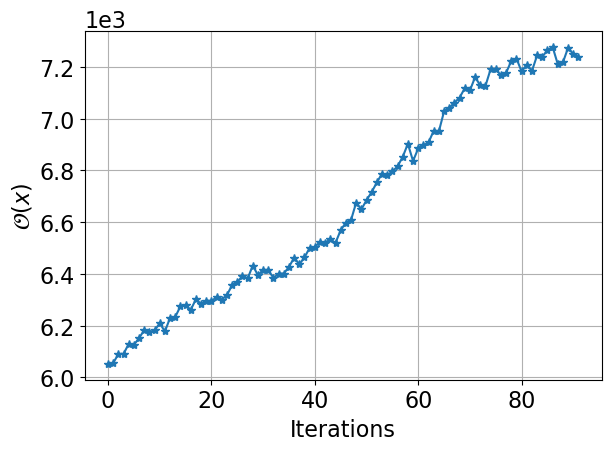

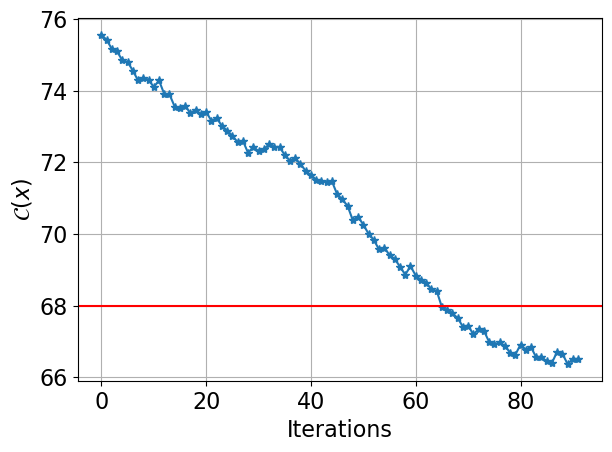

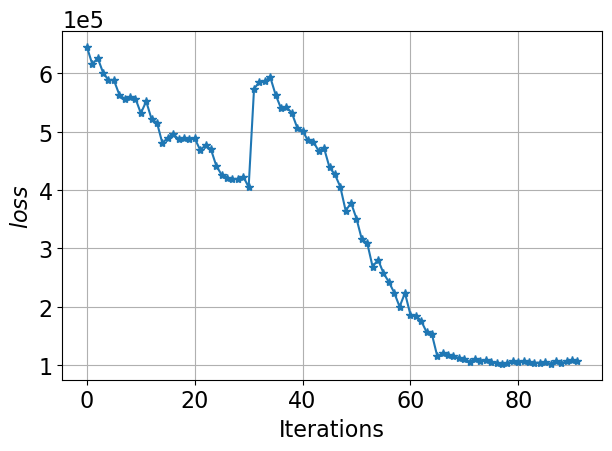

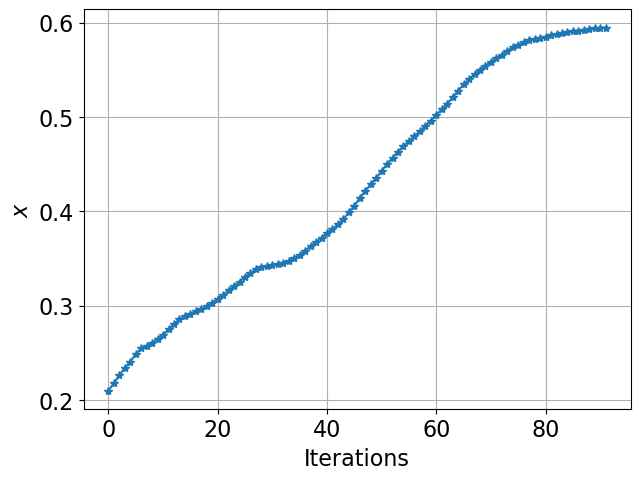

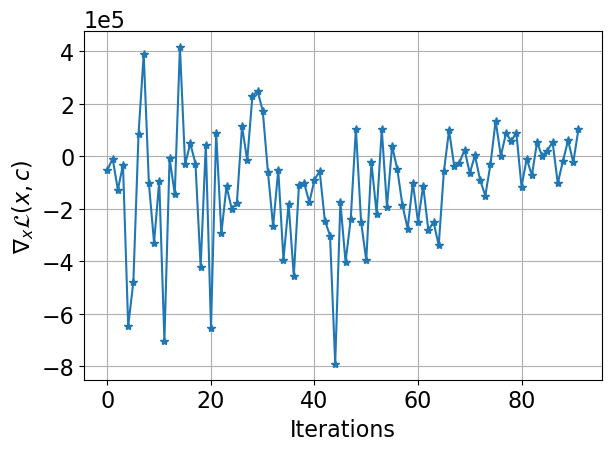

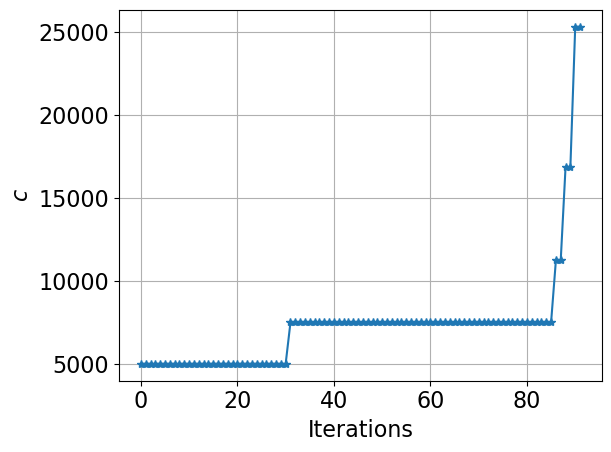

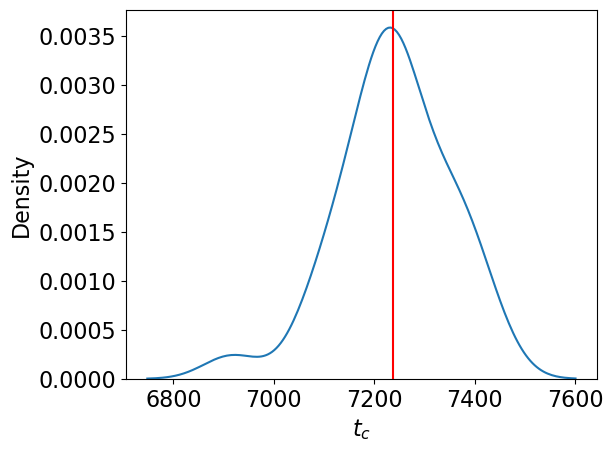

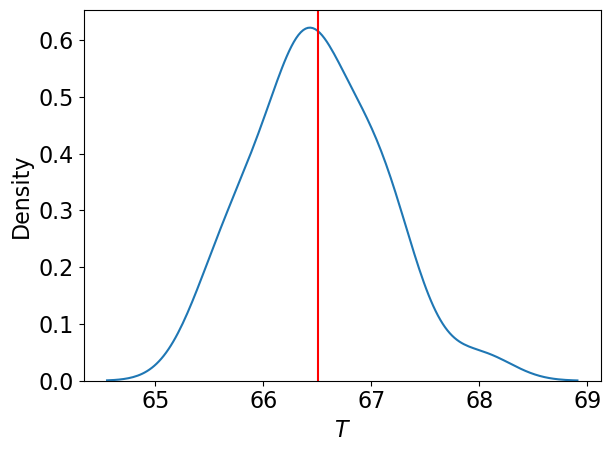

In [3]:
fig1, fig2, fig3, fig4, fig5, fig6, fig7, fig8 = plot_optimisation_results(path_data='./Results/OptimisationResults_2022_11_09-06_13_54_PM.csv',path_solver_output='./Results/Y_b_opt_x2022_11_09-06_13_54_PM.npy',path_pdf='./Results/')

In [12]:
df = pd.read_csv('./Results/OptimisationResults_2022_10_27-12_27_21_AM.csv',index_col=0)

In [10]:
df

,loss,X,X_grad,E_objective,E_constraints
0,862.718434,0.800000,277.066862,8627.184338,58.818565
1,851.513817,0.754646,117.179986,8515.138172,59.640398
2,815.798882,0.707856,381.016894,8157.988817,62.422355
3,774.350236,0.665931,66.628722,7743.502361,62.976672
4,739.601428,0.621216,384.476171,7396.014279,66.381548
5,785.807369,0.575621,257.566410,7858.073692,63.675902
6,711.319748,0.568319,-764.488372,7019.831079,68.093366
7,732.595647,0.560001,78.233692,7325.956471,66.318393
8,773.917403,0.572040,-1018.732609,7273.486540,68.465687
9,749.789466,0.580174,152.673190,7497.894662,66.019436


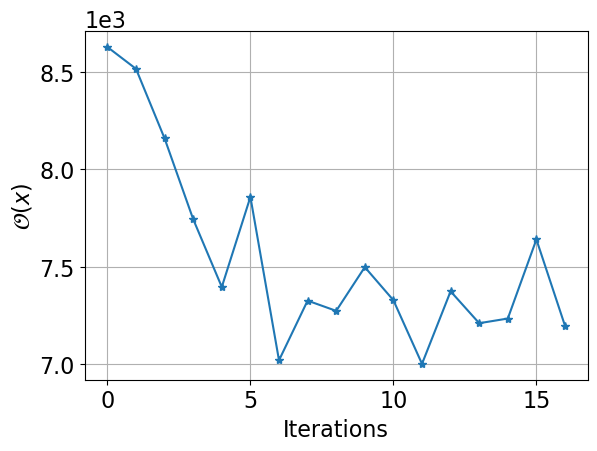

In [59]:
plt.tight_layout()
plt.plot(df['E_objective'],'*-')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

plt.grid()
plt.xlabel('Iterations')
plt.ylabel('$\mathcal{O}(x)$')
plt.tight_layout()
plt.savefig('Results/objective_opt_'+datetime+'.pdf')

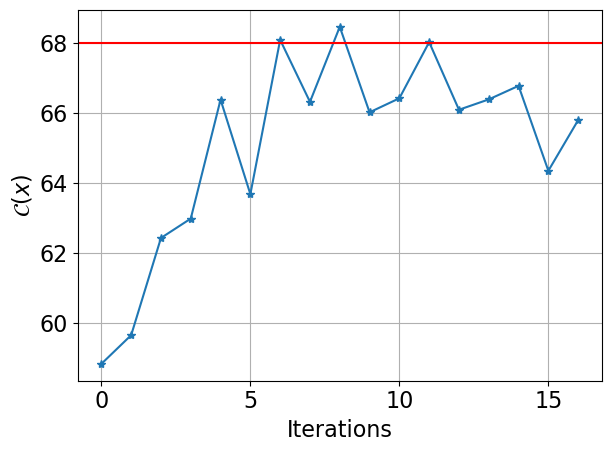

In [60]:
plt.plot(df['E_constraints'],'*-')
plt.grid()
plt.tight_layout()
plt.axhline(y = 68, color = 'r', linestyle = '-')
plt.xlabel('Iterations')
plt.ylabel('$\mathcal{C}(x)$')
plt.tight_layout()
plt.savefig('Results/constraints_opt_'+datetime+'.pdf')

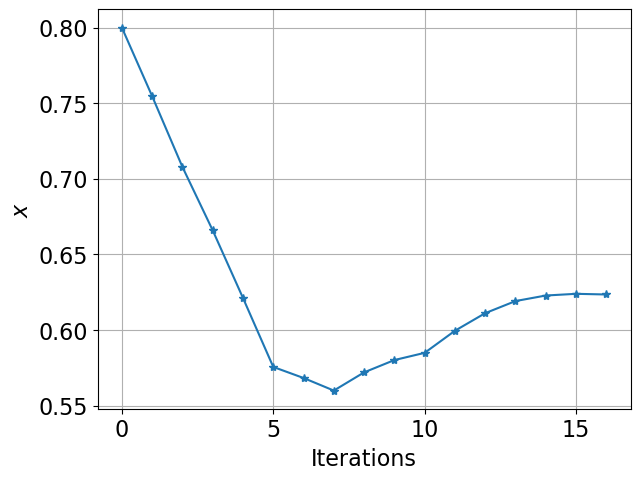

In [51]:
plt.plot(df['X'],'*-')
plt.tight_layout()
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('$x$')
plt.savefig('Results/X_evolution_opt_'+datetime+'.pdf')

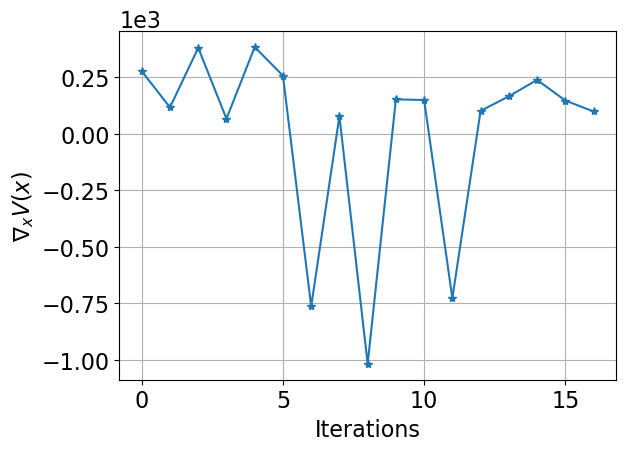

In [58]:
plt.plot(df['X_grad'],'*-')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

plt.grid()
plt.xlabel('Iterations')
plt.ylabel(r'$\nabla_x V(x)$')
plt.tight_layout()
plt.savefig('Results/x_grad_evolution_opt_'+datetime+'.pdf')

In [28]:
y_b = np.load('./Results/Y_b_opt_x2022_10_27-12_27_21_AM.npy')

Text(0.5, 0, '$t_c$')

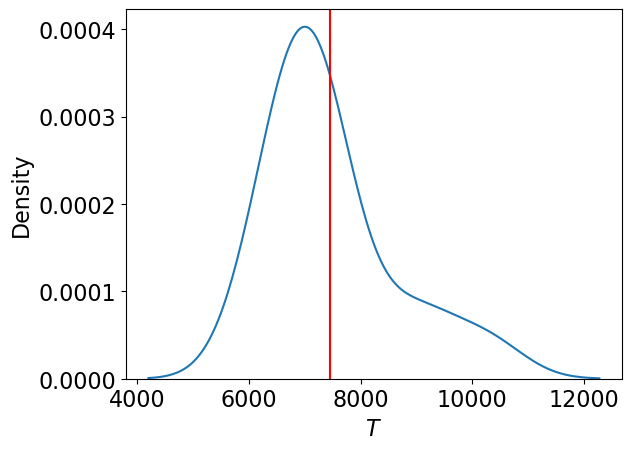

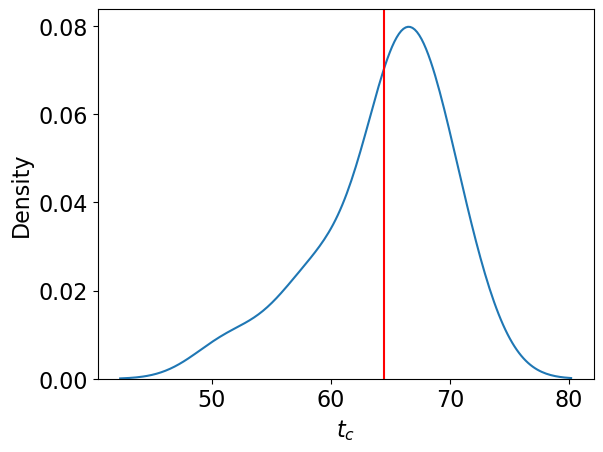

In [66]:
plt.figure()
sns.kdeplot(y_b[:,0])
plt.axvline(x=np.mean(y_b[:,0]),color = 'r', linestyle = '-')
plt.xlabel('$T$')
plt.figure()
sns.kdeplot(y_b[:,1])
plt.axvline(x=np.mean(y_b[:,1]),color = 'r', linestyle = '-')
plt.xlabel('$t_c$')

In [32]:
y_b_sumt = np.load('./Results/Y_b_opt_x2022_10_26-10_31_46_PM.npy')

<AxesSubplot:ylabel='Density'>

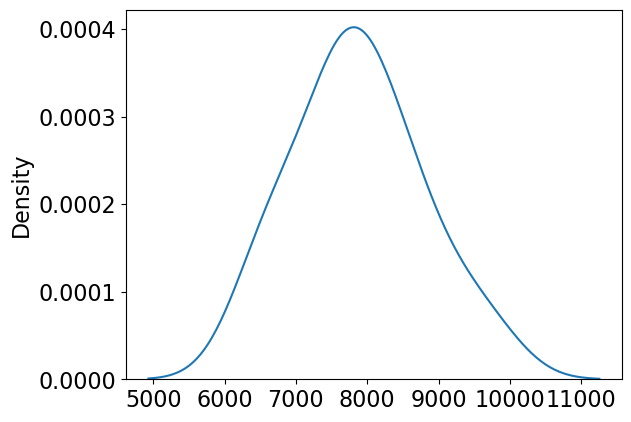

In [36]:
sns.kdeplot(y_b_sumt[:,0])

## --------------

In [39]:
df_sumt = pd.read_csv('./Results/OptimisationResults_2022_10_26-10_31_46_PM.csv',index_col=0)

Text(0, 0.5, '$\\mathcal{O}(x)$')

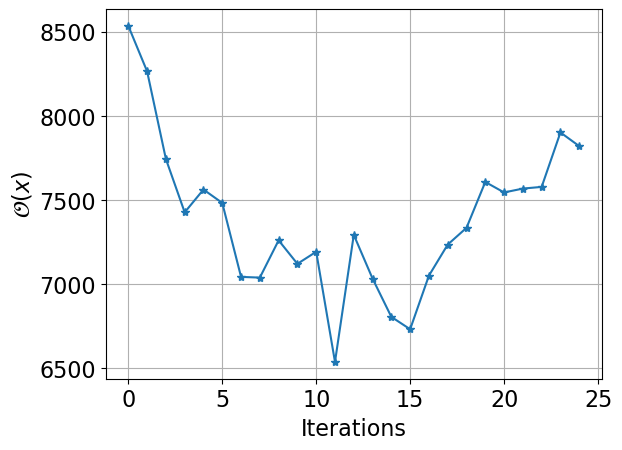

In [40]:
plt.plot(df_sumt['E_objective'],'*-')
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('$\mathcal{O}(x)$')

Text(0, 0.5, '$\\mathcal{C}(x)$')

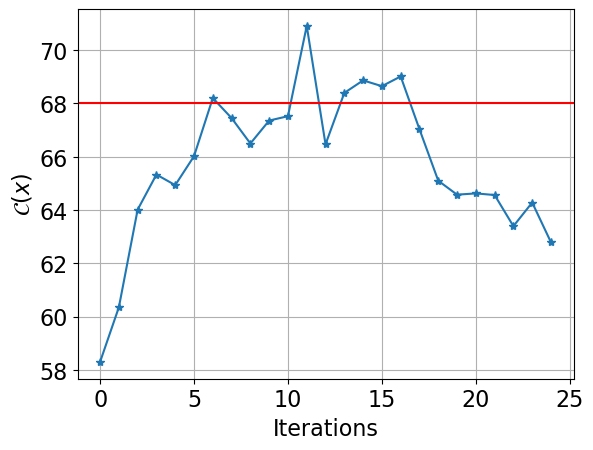

In [41]:
plt.plot(df_sumt['E_constraints'],'*-')
plt.grid()
plt.axhline(y = 68, color = 'r', linestyle = '-')
plt.xlabel('Iterations')
plt.ylabel('$\mathcal{C}(x)$')

Text(0, 0.5, '$x$')

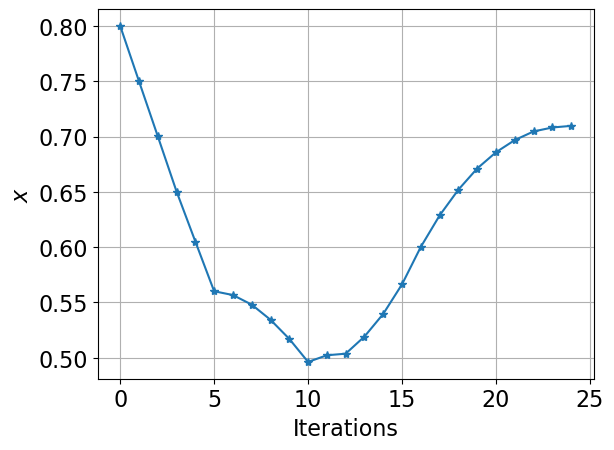

In [42]:
plt.plot(df_sumt['X'],'*-')
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('$x$')

Text(0, 0.5, '$\\nabla_x V(x)$')

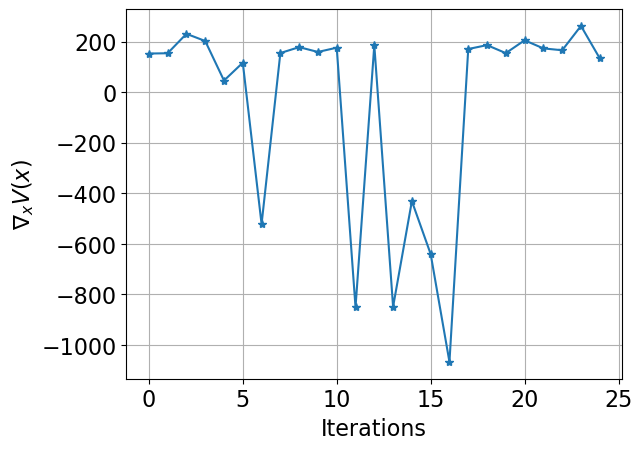

In [43]:
plt.plot(df_sumt['X_grad'],'*-')
plt.grid()
plt.xlabel('Iterations')
plt.ylabel(r'$\nabla_x V(x)$')